# Reading Data from API Gateway with Python's `requests`

This notebook provides a tutorial on how to interact with an API Gateway endpoint using Python's `requests` library to retrieve data. We will cover making basic GET requests, handling common API Gateway features like headers, and integrating the response with Pandas for data analysis.

## What is an API Gateway?

An API Gateway acts as the single entry point for a group of microservices. It handles common tasks like authentication, authorization, routing, rate limiting, and monitoring, protecting the backend services from direct exposure. When you access data from an API, you're often interacting with an API Gateway.

## Prerequisites

We will be using two primary Python libraries:

-   `requests`: For making HTTP requests to web services.
-   `pandas`: For data manipulation and analysis, especially after receiving JSON data.

If you don't have them installed, run the following command in your terminal or a new notebook cell:

In [ ]:
!pip install requests pandas

## 1. Making a Basic GET Request

The most common way to retrieve data from an API is via an HTTP GET request. The `requests.get()` function is used for this purpose.

For demonstration, we'll use a public API that mimics a simple data endpoint. Imagine this is your API Gateway endpoint.

In [9]:
import requests
import pandas as pd

# Replace this with your actual API Gateway URL
api_gateway_url = "https://jsonplaceholder.typicode.com/posts"

try:
    response = requests.get(api_gateway_url)
    response.raise_for_status() # Raise an exception for HTTP errors (4xx or 5xx)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        data = response.json() # Parse the JSON response
        print("Successfully fetched data!")
        for i in data:
            print(i)
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        print("Response content:", response.text)
        
except requests.exceptions.HTTPError as http_err:
    print(f"HTTP error occurred: {http_err}")
except requests.exceptions.ConnectionError as conn_err:
    print(f"Connection error occurred: {conn_err}")
except requests.exceptions.Timeout as timeout_err:
    print(f"Timeout error occurred: {timeout_err}")
except requests.exceptions.RequestException as req_err:
    print(f"An error occurred: {req_err}")

Successfully fetched data!
{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}
{'userId': 1, 'id': 2, 'title': 'qui est esse', 'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'}
{'userId': 1, 'id': 3, 'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut', 'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'}
{'userId': 1, 'id': 4, 'title': 'eum et est occaecati', 'body': 'ullam et saepe reiciendis voluptatem adipisci\nsit amet autem assumenda provident 

## 2. Handling API Gateway Specifics (Headers & Parameters)

API Gateway often requires specific headers (e.g., `x-api-key` for API key authentication) or uses query parameters to filter/control the data. The `requests` library makes it easy to include these.

### Including Custom Headers (e.g., API Key)

If your API Gateway requires an API key, you'll typically pass it in a header named `x-api-key` or `Authorization`.

In [7]:
# Example: API Key (replace 'YOUR_API_KEY' with your actual key)
headers = {
    "x-api-key": "YOUR_API_KEY", 
    "Content-Type": "application/json"
}

# For this demo, the placeholder API doesn't use API keys, 
# so we'll use a different endpoint that accepts query parameters.
api_gateway_url_with_params = "https://jsonplaceholder.typicode.com/comments"

try:
    # Make the request with headers
    # In a real scenario, this URL would be your API Gateway endpoint requiring the key
    response_with_headers = requests.get(api_gateway_url_with_params, headers=headers)
    response_with_headers.raise_for_status()
    print("Request with headers successful (if API supported it)!")
    print(response_with_headers.json()[:1]) # Uncomment to see response

except requests.exceptions.RequestException as e:
    print(f"Error making request with headers: {e}")

Request with headers successful (if API supported it)!
[{'postId': 1, 'id': 1, 'name': 'id labore ex et quam laborum', 'email': 'Eliseo@gardner.biz', 'body': 'laudantium enim quasi est quidem magnam voluptate ipsam eos\ntempora quo necessitatibus\ndolor quam autem quasi\nreiciendis et nam sapiente accusantium'}]


### Including Query Parameters

Query parameters are appended to the URL after a `?` (e.g., `?param1=value1&param2=value2`). `requests` handles this automatically if you provide them as a dictionary to the `params` argument.

In [ ]:
# Example: Get comments for a specific post ID
params = {
    "postId": 1 # Get comments belonging to post ID 1
}

try:
    response_with_params = requests.get(api_gateway_url_with_params, params=params)
    response_with_params.raise_for_status()
    
    comments_data = response_with_params.json()
    print(f"Fetched {len(comments_data)} comments for postId=1.")
    print("First comment:", comments_data[0])
    
except requests.exceptions.RequestException as e:
    print(f"Error making request with parameters: {e}")

## 3. Parsing the Response and Integrating with Pandas

Most API Gateway responses are in JSON format. Pandas' `DataFrame` can be directly created from a list of dictionaries (which is what `response.json()` often returns).


--- Posts DataFrame Head ---
   userId  id                                              title  \
0       1   1  sunt aut facere repellat provident occaecati e...   
1       1   2                                       qui est esse   
2       1   3  ea molestias quasi exercitationem repellat qui...   
3       1   4                               eum et est occaecati   
4       1   5                                 nesciunt quas odio   

                                                body  
0  quia et suscipit\nsuscipit recusandae consequu...  
1  est rerum tempore vitae\nsequi sint nihil repr...  
2  et iusto sed quo iure\nvoluptatem occaecati om...  
3  ullam et saepe reiciendis voluptatem adipisci\...  
4  repudiandae veniam quaerat sunt sed\nalias aut...  

--- Posts DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  100 non-null 

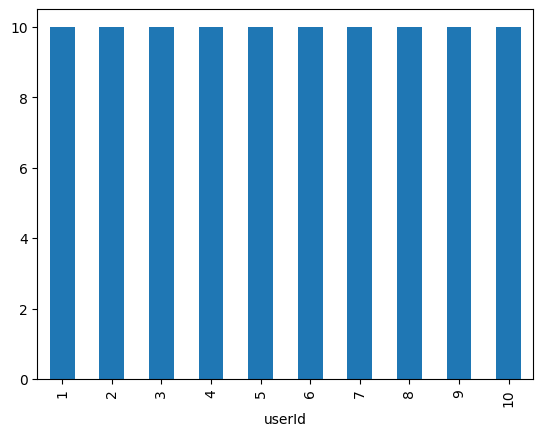

In [13]:
# Re-fetch data from the original posts endpoint for a clean DataFrame example
try:
    response_posts = requests.get(api_gateway_url)
    response_posts.raise_for_status()
    
    posts_data = response_posts.json()
    
    # Convert JSON data to Pandas DataFrame
    df_posts = pd.DataFrame(posts_data)
    
    print("\n--- Posts DataFrame Head ---")
    print(df_posts.head())
    
    print("\n--- Posts DataFrame Info ---")
    df_posts.info()
    
    print("\n--- Posts by User ID (Top 5) ---")
    print(df_posts['userId'].value_counts().head())


    df_posts['userId'].value_counts().plot(kind='bar')
    
except requests.exceptions.RequestException as e:
    print(f"Error fetching posts data: {e}")

## Conclusion

You've learned how to make HTTP GET requests to an API Gateway (or any REST API) using Python's `requests` library. We covered including headers and query parameters, robust error handling, and seamlessly converting the JSON response into a Pandas DataFrame for further analysis. This forms the foundation for building data pipelines that consume data from web services.

In [93]:
import numpy as np

l1 = np.array([12,23,45,6,7,8,9,0,1,2,3,44,3,5,6,77,88,0,4,33,2,2,2,2,2])
price = l1*100
dates = ["Day"+str(num) for num in range(1, len(l1)+1)]
df1 = pd.DataFrame({"sales":l1, "price":price}, index=["Item"+str(num) for num in range(1, len(l1)+1)])
df1['dates'] = dates
#print(df1.head())
# print("df1.iloc[1,0] = ", df1.iloc[1,0])
# print("df1.loc[\"Item1\"] = ", df1.loc["Item2"]["sales"])

# Group by sales and sum all prices 
df2 = df1.groupby('dates')['price'].sum().sort_values(ascending=False)
df_posts = df2[:10]
print(df_posts)

dates
Day17    8800
Day16    7700
Day3     4500
Day12    4400
Day20    3300
Day2     2300
Day1     1200
Day7      900
Day6      800
Day5      700
Name: price, dtype: int64


In [92]:
%matplotlib inline
import matplotlib.pyplot as plt


import numpy as np

l1 = np.array([12,23,45,6,7,8,9,0,1,2,3,44,3,5,6,77,88,0,4,33,2,2,2,2,2])
price = l1*100
dates = ["Day"+str(num) for num in range(1, len(l1)+1)]
df1 = pd.DataFrame({"sales":l1, "price":price}, index=["Item"+str(num) for num in range(1, len(l1)+1)])
df1['dates'] = dates
#print(df1.head())
# print("df1.iloc[1,0] = ", df1.iloc[1,0])
# print("df1.loc[\"Item1\"] = ", df1.loc["Item2"]["sales"])

# Group by sales and sum all prices 
df2 = df1.groupby('dates')['price'].sum().sort_values(ascending=False)
df_posts = df2[:10]
print(df_posts)
plt.figure(figsize=(9, 6))
plt.scatter(df_posts['dates'], df_posts['price'], alpha=0.7, color='teal', s=100) # s for size of markers
plt.title('Post ID vs. User ID')
plt.xlabel('User ID')
plt.ylabel('Post ID')
plt.xticks(df_posts['userId'].unique())
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

KeyError: 'dates'

<Figure size 900x600 with 0 Axes>